# Supervised classification


In [71]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression


In the data.csv there are letters (uppercases and lowercases) and numbers in a row format, in the cell below load the **data_all.csv** and explore it.


In [74]:
# Your code here
df = pd.read_csv('data_all.csv')

In [79]:
df.head(10)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [58]:
df.e.value_counts()

1.0     6330
7.0     6139
3.0     5969
2.0     5869
0.0     5778
        ... 
41.0     400
20.0     382
60.0     381
51.0     368
45.0     317
Name: e, Length: 62, dtype: int64

In [59]:
df.columns

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

In [60]:
df.describe()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.000000,116322.000000,116322.000000,116322.000000,116322.000000,...,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0
mean,19.252695,0.0,0.0,0.0,0.0,0.000009,0.001083,0.002141,0.002149,0.001788,...,0.000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,17.817294,0.0,0.0,0.0,0.0,0.002932,0.369436,0.730077,0.733009,0.609863,...,0.058641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,61.000000,0.0,0.0,0.0,0.0,1.000000,126.000000,249.000000,250.000000,208.000000,...,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Now than you had identified your data, try to define your X and y (target) for next classification models.

In [75]:
# Your code here
X = df.drop(columns='e')
y = df.e

Before applying any model, you need to know which labels are which, to solve this you need to reshape your X-dataset into 28x28 pixels in a variable called `x_images`. <br> **Hint:** You can use *np.reshape(size of data, 28, 28))*

In [62]:
# Your code here
x_images = np.reshape(X.columns, (28, 28))

In [78]:
y.shape

(116322,)

In [83]:
x_images = np.reshape(X.shape[0], (28, 28))

ValueError: cannot reshape array of size 1 into shape (28,28)

In [93]:
np.reshape(X.shape[0], 28, 28)

TypeError: order must be str, not int

In [87]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In this way, you need to visualize some data to realize which number-labels represents a letter or a number.
<br> **Hint:** You can use *plt.imshow()*

In [81]:
# Your code here
X.shape[0]

116322

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

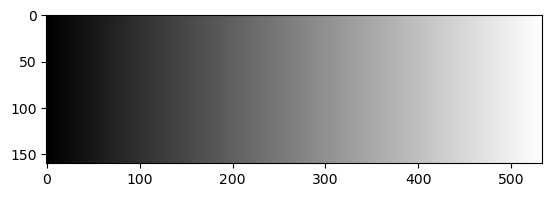

In [69]:
plt.imshow(X, cmap = "gray")

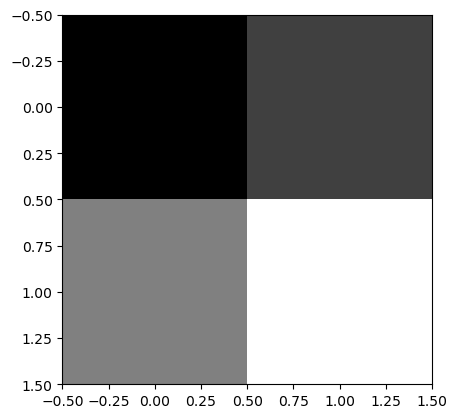

In [66]:
a = np.array([0, 64, 128, 255]).reshape(2, 2)
plt.imshow(a, cmap = "gray");

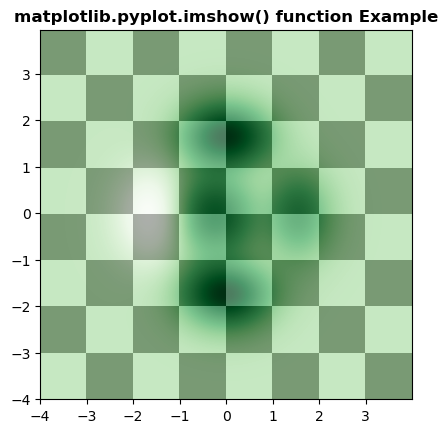

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
      
dx, dy = 0.015, 0.05
x = np.arange(-4.0, 4.0, dx)
y = np.arange(-4.0, 4.0, dy)
X, Y = np.meshgrid(x, y)
   
extent = np.min(x), np.max(x), np.min(y), np.max(y)
   
Z1 = np.add.outer(range(8), range(8)) % 2
plt.imshow(Z1, cmap ="binary_r", interpolation ='nearest',
                               extent = extent, alpha = 1)
   
def geeks(x, y):
    return (1 - x / 2 + x**5 + y**6) * np.exp(-(x**2 + y**2))
   
Z2 = geeks(X, Y)
   
plt.imshow(Z2, cmap ="Greens", alpha = 0.7, 
           interpolation ='bilinear', extent = extent)
  
plt.title('matplotlib.pyplot.imshow() function Example', 
                                     fontweight ="bold")
plt.show()

In [76]:
def visualize_classifier(classifier, X, y, title=''):
  #obteniendo nuestro min y max para el arange
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    # paso que tomara nuestro grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of X and Y values
    #manera automatica de crear un grid para nuestro rango de datos
    #x_vals convierte nustro arreglo de 2D en uno de 1D,
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    
    #Ejecutando neustro modelo para los valores
    #Ravel permite convertir el arerglo a 1 D
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    # Cambiamos el tamoño de nuestro output 
    output = output.reshape(x_vals.shape)
    
    # Create a plot
    plt.figure()
    
    # Specify the title
    plt.title(title)
    
    # Creamos el color de nustra grafica. Practicamente es estar mapeando los limites de donde a donde
    #va a colorear y los colores o escalara de colores la determinamos en cmap
    # Colores secuenciales, divergentes, etc...
    #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.hot)
    # Crea un scatterplot con cada valor de X y y, color del marker
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # Especigicamos de donde a donde va nuestro plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    # Especificamos marcador en nuestro eje x y y.
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    plt.show()

In [77]:
visualize_classifier(LogisticRegression, X,y , 'ejemplo')

InvalidIndexError: (slice(None, None, None), 0)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [ ]:
# Your code here

* Try to do the same thing with lowercases.

In [ ]:
# Your code here

* Try to do the same thing with numbers.

In [ ]:
# Your code here